In [33]:
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch, add_image, FontManager, Sbopen
import cmasher as cmr
from statsbombpy import sb
from scipy.ndimage import gaussian_filter
from mplsoccer import Pitch
import matplotlib.patheffects as path_effects

In [34]:
# Spain vs Poland
MATCH_ID = 3788762
TEAM = 'Poland'
parser = Sbopen()
events, related, freeze, players = parser.event(MATCH_ID)


In [35]:
team_pressure = (events.team_name == TEAM) & (events.type_name == 'Pressure')
team_pressure = events.loc[team_pressure, ['x', 'y']]

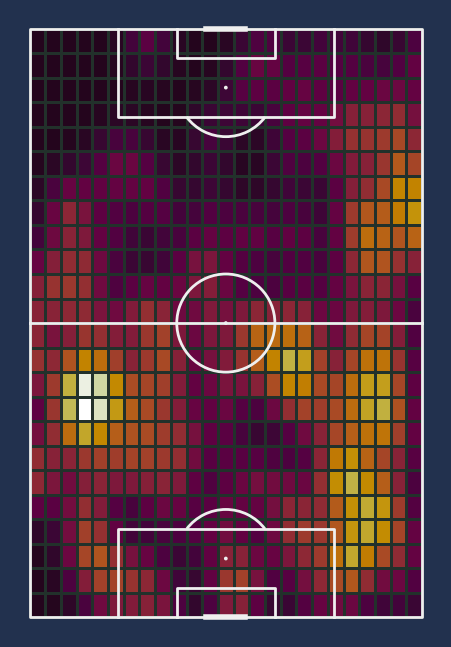

In [36]:
# setup pitch
pitch = VerticalPitch(pitch_type='statsbomb', 
                      line_zorder=2,
              pitch_color='#22314E',  #kolor boków
              line_color='#efefef')
# draw
fig, ax = pitch.draw(figsize=(4.4, 6.4), constrained_layout=True, tight_layout=False)
fig.set_facecolor('#22314E') # kolor ramki
bin_statistic = pitch.bin_statistic(team_pressure.x, team_pressure.y, statistic='count', bins=(24, 25))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap(bin_statistic, ax=ax, cmap=cmr.fall, edgecolors='#22312b')

plt.savefig('Images/heatMap_Euro_1.png')

KdePlot

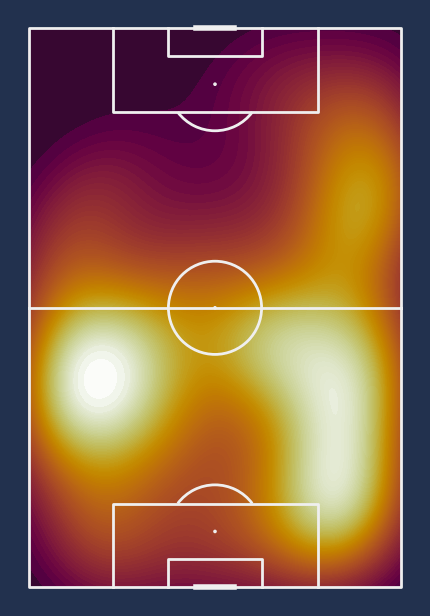

In [37]:
pitch = VerticalPitch(line_color='#efefef', line_zorder=2, pitch_color='#22314E')
fig, ax = pitch.draw(figsize=(4.4, 6.4))
fig.set_facecolor('#22314E')
kde = pitch.kdeplot(team_pressure.x, team_pressure.y, ax=ax,
                    # fill using 100 levels so it looks smooth
                    fill=True, levels=100,
                    # shade the lowest area so it looks smooth
                    # so even if there are no events it gets some color
                    thresh=0,
                    cut=4,  # extended the cut so it reaches the bottom edge
                    #cmap=flamingo_cmap
                    cmap = cmr.fall)

plt.savefig('Images/heatMap_Euro_2.png')

Heat Map 3

In [38]:
# path effects
path_eff = [path_effects.Stroke(linewidth=1.5, foreground='black'),
            path_effects.Normal()]

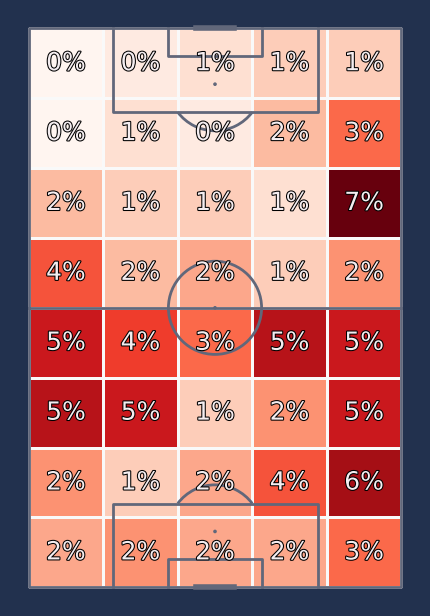

In [39]:
pitch = VerticalPitch(pitch_type='statsbomb', line_zorder=2, pitch_color='#22314E', line_color='#61677A')
fig, ax = pitch.draw(figsize=(4.4, 6.4))
fig.set_facecolor('#22314E')
bin_statistic = pitch.bin_statistic(team_pressure.x, team_pressure.y, statistic='count', bins=(8, 5), normalize=True)
pitch.heatmap(bin_statistic, ax=ax, cmap='Reds', edgecolor='#f9f9f9')
labels = pitch.label_heatmap(bin_statistic, color='#f4edf0', fontsize=18,
                             ax=ax, ha='center', va='center',
                             str_format='{:.0%}', path_effects=path_eff)

plt.savefig('Images/heatMap_Euro_3.png')

Heat map Juego de Posición

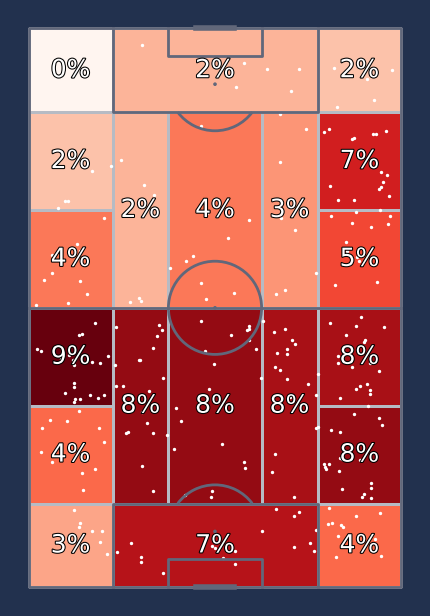

In [41]:
# setup pitch
pitch = VerticalPitch(pitch_type='statsbomb', line_zorder=2,
                      pitch_color='#22314E', line_color='#61677A')
# draw
fig, ax = pitch.draw(figsize=(4.4, 6.4))
bin_statistic = pitch.bin_statistic_positional(team_pressure.x, team_pressure.y, statistic='count',
                                               positional='full', normalize=True)
pitch.heatmap_positional(bin_statistic, ax=ax, cmap='Reds', edgecolors='#22312b', color='#B6BBC4')
pitch.scatter(team_pressure.x, team_pressure.y, c='white', s=2, ax=ax)
labels = pitch.label_heatmap(bin_statistic, color='white', fontsize=18,
                             ax=ax, ha='center', va='center',
                             str_format='{:.0%}', path_effects=path_eff)

fig.set_facecolor('#22314E')

plt.savefig('Images/heatMap_Euro_Juego_de_Posicion.png')